In [32]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from scipy.stats import genextreme as gev

from unseen import fileio
from unseen import time_utils
from unseen import indices
from unseen import general_utils

In [2]:
agcd_files = glob.glob('/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_*_daily.nc')
agcd_files.sort()

### Entire East Coast (EC) flood zone

In [3]:
ec_ds_list = []
for infile in agcd_files:
    print(infile)
    ds = fileio.open_dataset(
        infile,
        metadata_file='/home/599/dbi599/forks/unseen/config/dataset_agcd_daily.yml',
        shapefile='/g/data/xv83/dbi599/east-coast-rain/shapefiles/east-coast-flood.shp',
        variables=['pr'],
        spatial_agg='mean', 
    )
    ds = ds.compute()
    ec_ds_list.append(ds)

/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19000101-19001231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19010101-19011231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19020101-19021231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19030101-19031231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19040101-19041231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19050101-19051231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19060101-19061231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19070101-19071231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19080101-19081231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19090101-19091231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19100101-19101231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total

/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19950101-19951231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19960101-19961231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19970101-19971231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19980101-19981231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19990101-19991231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20000101-20001231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20010101-20011231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20020101-20021231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20030101-20031231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20040101-20041231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20050101-20051231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total

In [4]:
ec_ds = xr.concat(ec_ds_list, dim='time')

In [5]:
ec_ds

<xarray.Dataset>
Dimensions:  (time: 44641)
Coordinates:
  * time     (time) object 1900-01-01 09:00:00 ... 2022-03-22 09:00:00
Data variables:
    pr       (time) float32 2.617 0.2759 0.1095 0.3672 ... 3.118 0.1763 0.01809
Attributes: (12/33)
    CDI:                           Climate Data Interface version ?? (http://...
    history:                       Tue Sep 03 14:23:23 2019: cdo -O -z zip_4 ...
    institution:                   Australian Bureau of Meteorology, GPO Box ...
    Conventions:                   CF-1.6
    geospatial_lat_min:            -44.525
    geospatial_lat_max:            -9.975
    ...                            ...
    url:                           http://www.bom.gov.au/climate/
    licence:                       Copyright for any data supplied by the Bur...
    id:                            Australian Gridded Climate Data (AGCD)
    summary:                       The daily and monthly rainfall data repres...
    naming_authority:              au.gov.bom
    CDO:                           Climate Data Operators version 1.7.0 (http...

In [6]:
ec_ds = ec_ds.compute()

In [9]:
ec_clim = ec_ds.groupby('time.month').mean()
ec_clim

<xarray.Dataset>
Dimensions:  (month: 12)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    pr       (month) float32 3.911 4.512 3.925 2.809 ... 1.626 2.32 2.832 3.37

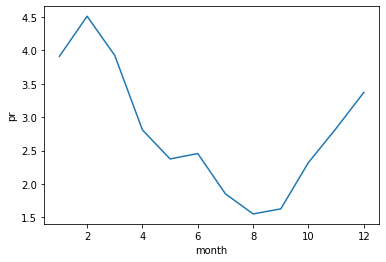

In [11]:
ec_clim['pr'].plot()

In [12]:
ec_ds_15day = ec_ds.rolling({'time': 15}).sum()

In [13]:
ec_ds_rx15day = time_utils.temporal_aggregation(ec_ds_15day, 'A-AUG', 'D', 'max', ['pr'])

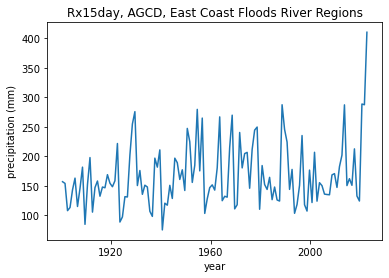

In [29]:
ec_ds_rx15day['pr'].plot()
plt.title('Rx15day, AGCD, East Coast Floods River Regions')
plt.ylabel('precipitation (mm)')
plt.xlabel('year')
plt.show()

In [17]:
years = ec_ds_rx15day['time'].dt.year.values
ec_df_rx15day = pd.DataFrame(index=years)
ec_df_rx15day['pr'] = ec_ds_rx15day['pr'].values

In [18]:
ec_df_rx15day['pr'].sort_values(ascending=False).head(n=10)

2022    410.447266
2020    288.797241
2021    287.604523
1988    287.580048
2013    287.378784
1954    279.746124
1929    275.874847
1968    269.900116
1963    267.014404
1956    264.991974
Name: pr, dtype: float64

In [21]:
ec_rx15day_max = ec_df_rx15day['pr'].values.max()
print(ec_rx15day_max)

410.447265625


In [42]:
def gev_analysis(ds, event, region):
    """Perform GEV analysis
    
    Args:
      ds (Pandas Series): Data sample
      event (float) : Event of interest
      region (str) : Name of spatial region
    """

    gev_shape, gev_loc, gev_scale = indices.fit_gev(ds.values)
    print(f'Shape parameter: {gev_shape:.2f}')
    print(f'Location parameter: {gev_loc:.2f}')
    print(f'Scale parameter: {gev_scale:.2f}')

    fig, ax = plt.subplots(figsize=[10, 8])
    gev_xvals = np.arange(0, 700)
    ds.plot.hist(bins=40, density=True, color='tab:green', alpha=0.5)
    gev_pdf = gev.pdf(gev_xvals, gev_shape, gev_loc, gev_scale)
    plt.plot(gev_xvals, gev_pdf, color='tab:green', linewidth=4.0)
    plt.xlabel('precipitation (mm)')
    plt.ylabel('probability')
    plt.title(f'Annual (Sep-Aug) Rx15day for {region} (AGCD)')
    #plt.savefig(f'/g/data/xv83/dbi599/east-coast-rain/figures/ec_Rx15day_histogram_AGCD_r005.png',
    #            bbox_inches='tight', facecolor='white', dpi=dpi)
    plt.show()
    
    gev_data = gev.rvs(gev_shape, gev_loc, gev_scale, size=5000000)
    percentile, return_period = general_utils.event_in_context(gev_data, event, 'above')
    print(f'{percentile:.2f}% percentile')
    print(f'{return_period:.0f} year return period\n')

Shape parameter: -0.06
Location parameter: 142.94
Scale parameter: 39.14


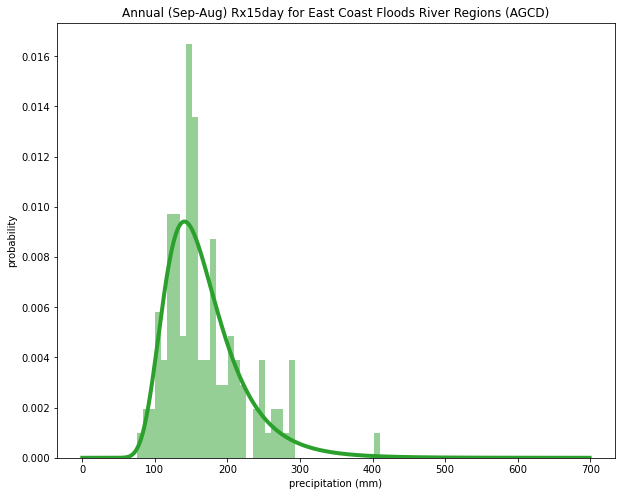

99.67% percentile
307 year return period



In [43]:
gev_analysis(ec_df_rx15day['pr'], ec_rx15day_max, 'East Coast Floods River Regions')

Shape parameter: -0.01
Location parameter: 143.16
Scale parameter: 38.61


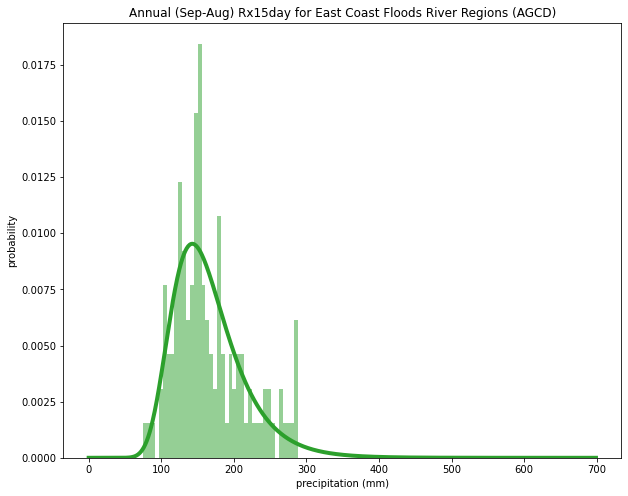

99.87% percentile
793 year return period



In [46]:
gev_analysis(ec_df_rx15day['pr'][:-1], ec_rx15day_max, 'East Coast Floods River Regions')

## NSW coast

In [47]:
sec_ds_list = []
for infile in agcd_files:
    print(infile)
    ds = fileio.open_dataset(
        infile,
        metadata_file='/home/599/dbi599/forks/unseen/config/dataset_agcd_daily.yml',
        shapefile='/g/data/xv83/dbi599/east-coast-rain/shapefiles/south-east-coast-nsw.shp',
        variables=['pr'],
        spatial_agg='mean', 
    )
    ds = ds.compute()
    sec_ds_list.append(ds)

/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19000101-19001231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19010101-19011231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19020101-19021231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19030101-19031231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19040101-19041231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19050101-19051231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19060101-19061231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19070101-19071231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19080101-19081231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19090101-19091231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19100101-19101231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total

/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19950101-19951231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19960101-19961231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19970101-19971231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19980101-19981231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19990101-19991231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20000101-20001231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20010101-20011231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20020101-20021231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20030101-20031231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20040101-20041231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_20050101-20051231_daily.nc
/g/data/xv83/agcd-csiro/precip/precip-total

In [48]:
sec_ds = xr.concat(sec_ds_list, dim='time')

In [49]:
sec_ds = sec_ds.compute()

In [50]:
sec_clim = sec_ds.groupby('time.month').mean()

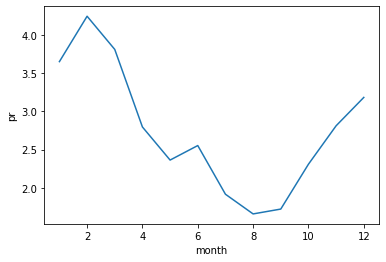

In [51]:
sec_clim['pr'].plot()
plt.show()

In [52]:
sec_ds_15day = sec_ds.rolling({'time': 15}).sum()

In [53]:
sec_ds_rx15day = time_utils.temporal_aggregation(sec_ds_15day, 'A-AUG', 'D', 'max', ['pr'])

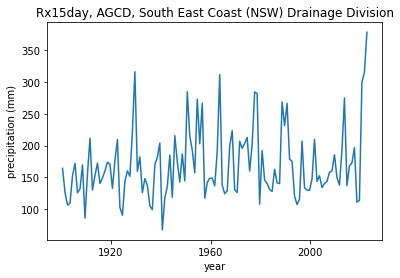

In [54]:
sec_ds_rx15day['pr'].plot()
plt.title('Rx15day, AGCD, South East Coast (NSW) Drainage Division')
plt.ylabel('precipitation (mm)')
plt.xlabel('year')
plt.show()

In [55]:
years = sec_ds_rx15day['time'].dt.year.values
sec_df_rx15day = pd.DataFrame(index=years)
sec_df_rx15day['pr'] = sec_ds_rx15day['pr'].values

In [56]:
sec_df_rx15day['pr'].sort_values(ascending=False).head(n=10)

2022    378.092957
1929    316.038940
2021    315.107513
1963    311.629669
2020    299.363068
1950    284.655304
1977    284.300171
1978    281.615540
2013    274.800537
1954    272.904175
Name: pr, dtype: float64

In [57]:
sec_rx15day_max = sec_df_rx15day['pr'].values.max()
print(sec_rx15day_max)

378.09295654296875


Shape parameter: -0.04
Location parameter: 144.80
Scale parameter: 39.66


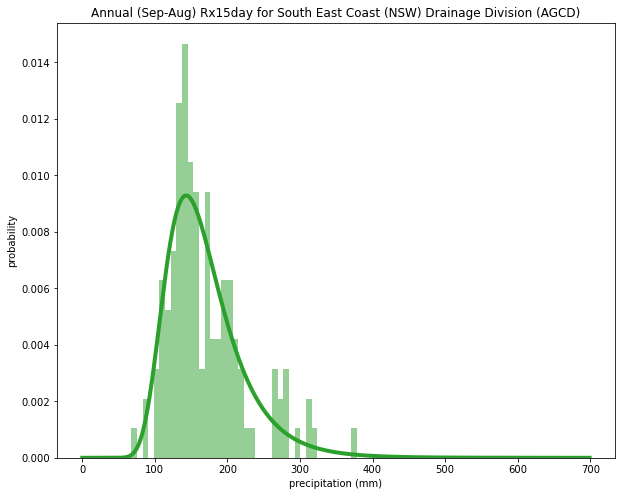

99.47% percentile
189 year return period



In [58]:
gev_analysis(sec_df_rx15day['pr'], sec_rx15day_max, 'South East Coast (NSW) Drainage Division')